<a href="https://colab.research.google.com/github/EduDN/FakeNews_Detector/blob/main/Webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# manipulación de datos de distintos formatos.
import pandas as pd
# separar los datos en un conjunto de entrenamiento, que se utiliza para entrenar el modelo, y un conjunto de prueba.
from sklearn.model_selection import train_test_split
# TfidfVectorizer es una técnica para convertir texto en representaciones numéricas que pueden ser utilizadas por algoritmos de aprendizaje automático.
from sklearn.feature_extraction.text import TfidfVectorizer
# representar recuentos, como el número de veces que una palabra aparece en un documento
from sklearn.naive_bayes import MultinomialNB

TfidfVectorizer se utiliza para convertir texto en características numéricas, mientras que MultinomialNB se utiliza como un clasificador después de que los datos ya han sido transformados

In [2]:
# nubre de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
##########################################################################
# Construir el DataFrame, conjuntos de entrenamiento y prueba.

# Construir el DataFrame a partir de un archivo CSV
df = pd.read_csv("/content/DATASET_NEWS.csv", encoding='latin1', index_col=0)

In [6]:
# Crear una serie para almacenar las etiquetas (labels)
y = df.label

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.05, random_state=53)


In [7]:
#########################################################################
# TfidfVectorizer para la clasificación de texto

# Inicializar un objeto TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Ajustar y transformar los datos de entrenamiento
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
tfidf_test = tfidf_vectorizer.transform(X_test)

In [8]:
##########################################################################
# Inspección de los vectores

# Convertir la matriz tfidf_train a un DataFrame para inspección opcional
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

In [9]:
############################################################################
# Entrenando el modelo "Fake News"

# Instanciar un clasificador Naive Bayes multinomial
nb_classifier = MultinomialNB(alpha=0.1)

# Entrenar el clasificador con los datos de entrenamiento
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=0.1)

In [11]:
###############################################################################
# Inspección del modelo

# Obtener las etiquetas de clase
class_labels = nb_classifier.classes_

# Extraer las características (palabras únicas en el vocabulario de todos los artículos)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Combinar los nombres de las características con los coeficientes y ordenar por peso
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Imprimir la primera etiqueta de clase y las 30 primeras características (palabras más asociadas con FALSO)
print(class_labels[0], feat_with_weights[0:30])

# Imprimir la segunda etiqueta de clase y las 30 últimas características (palabras más asociadas con REAL)
print(class_labels[1], feat_with_weights[-30:])

FAKE [(-11.583161082259958, '001'), (-11.583161082259958, '0036'), (-11.583161082259958, '0041'), (-11.583161082259958, '01'), (-11.583161082259958, '0109'), (-11.583161082259958, '02'), (-11.583161082259958, '024'), (-11.583161082259958, '039'), (-11.583161082259958, '050'), (-11.583161082259958, '051'), (-11.583161082259958, '058'), (-11.583161082259958, '0603'), (-11.583161082259958, '0613'), (-11.583161082259958, '0617'), (-11.583161082259958, '0621'), (-11.583161082259958, '0623'), (-11.583161082259958, '0632'), (-11.583161082259958, '0642'), (-11.583161082259958, '0649'), (-11.583161082259958, '0658'), (-11.583161082259958, '07'), (-11.583161082259958, '0700'), (-11.583161082259958, '0701'), (-11.583161082259958, '0703'), (-11.583161082259958, '0716'), (-11.583161082259958, '0724'), (-11.583161082259958, '0735'), (-11.583161082259958, '0745'), (-11.583161082259958, '0747'), (-11.583161082259958, '08')]
REAL [(-6.7644534619379835, 'care'), (-6.756226048558065, 'going'), (-6.740981

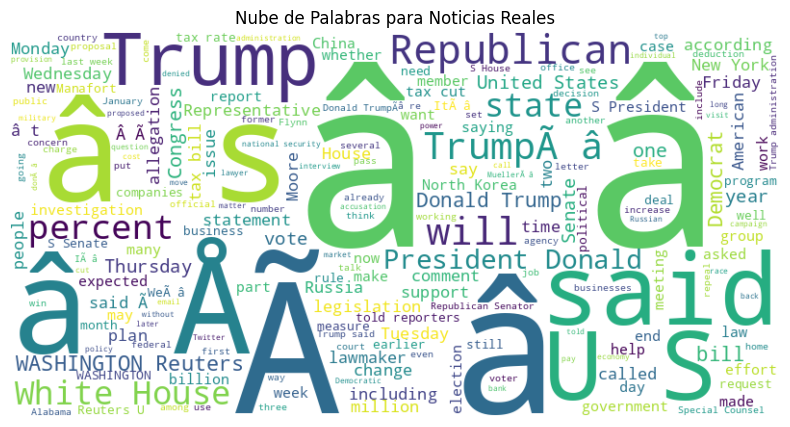

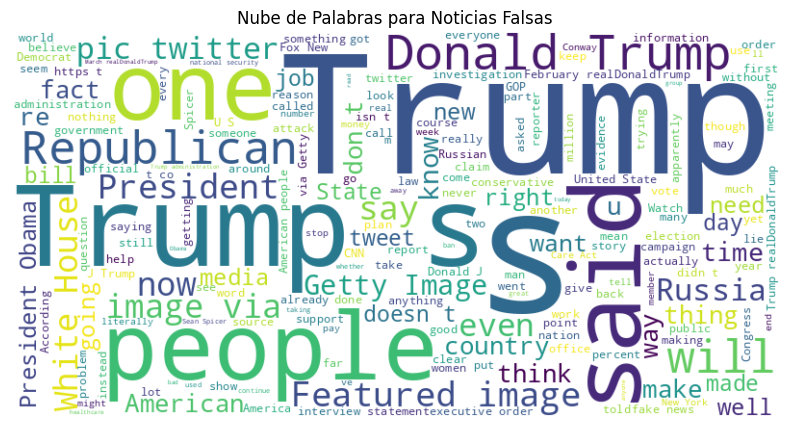

In [12]:
# Definir una función para generar nubes de palabras
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Extraer textos "Reales" y "Falsos"
real_text = ' '.join(df[df['label'] == 'REAL']['text'])
fake_text = ' '.join(df[df['label'] == 'FAKE']['text'])

# Generar nubes de palabras
generate_wordcloud(real_text, 'Nube de Palabras para Noticias Reales')
generate_wordcloud(fake_text, 'Nube de Palabras para Noticias Falsas')


In [ ]:
##########################################################################
# Pedir al usuario que ingrese el título y contenido de la noticia
titulo = input("Ingrese el título de la noticia: ")
contenido = input("Ingrese el contenido de la noticia: ")

# Preprocesar el texto de la noticia
texto_noticia = [titulo + " " + contenido]
tfidf_noticia = tfidf_vectorizer.transform(texto_noticia)

# Predecir si la noticia es falsa o no
prediccion = nb_classifier.predict(tfidf_noticia)

# Obtener las probabilidades
probabilidades = nb_classifier.predict_proba(tfidf_noticia)

# Porcentaje de probabilidad de que sea falsa
porcentaje_falsa = probabilidades[0][0] * 100

# Porcentaje de probabilidad de que sea real
porcentaje_real = probabilidades[0][1] * 100

# Imprimir el resultado
print(f"La noticia tiene un {porcentaje_falsa:.2f}% de probabilidad de ser falsa.")
print(f"La noticia tiene un {porcentaje_real:.2f}% de probabilidad de ser real.")